# Salary vs. Record

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [5]:
teams_filename = '/Users/kimkockenmeister/Desktop/Bootcamp/project1/data_analytics_project1/Data/Teams.csv'
teams_df = pd.read_csv(teams_filename)
teams_df.head()


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [20]:
salaries_filename='/Users/kimkockenmeister/Desktop/Bootcamp/project1/data_analytics_project1/Data/Salaries.csv'


salaries_df = pd.read_csv(salaries_filename)
salaries_df

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [21]:
sum_salaries=salaries_df.groupby(['teamID', 'yearID']).sum()
sum_salaries

salary
teamID yearID           
ANA    1997     31135472
       1998     41281000
       1999     55388166
       2000     51464167
       2001     47535167
...                  ...
WAS    2011     63856928
       2012     80855143
       2013    113703270
       2014    131983680
       2015    155587472

[888 rows x 1 columns]

In [22]:
sum_salaries.sort_values('salary',ascending=False)

salary
teamID yearID           
NYA    2013    231978886
LAN    2013    223362196
       2014    217014600
       2015    215792000
NYA    2015    212751957
...                  ...
MIN    1985      5764821
TEX    1988      5342131
SEA    1985      4613000
       1987      2263500
TEX    1987       880000

[888 rows x 1 columns]

In [23]:
merged_df= teams_df[['yearID','teamID','G','W','L']]
merged_df

,yearID,teamID,G,W,L
0,1871,BS1,31,20,10
1,1871,CH1,28,19,9
2,1871,CL1,29,10,19
3,1871,FW1,19,7,12
4,1871,NY2,33,16,17
...,...,...,...,...,...
2800,2015,LAN,162,92,70
2801,2015,SFN,162,84,78
2802,2015,ARI,162,79,83
2803,2015,SDN,162,74,88


In [30]:
sum_df=merged_df.groupby(['teamID', 'yearID']).sum()
final_df=sum_df.merge(sum_salaries, on=(['teamID','yearID']))
final_df=final_df.sort_values('salary',ascending=False)


In [31]:
small_df=final_df.head(20)
small_df

G    W   L     salary
teamID yearID                         
NYA    2013    162   85  77  231978886
LAN    2013    162   92  70  223362196
       2014    162   94  68  217014600
       2015    162   92  70  215792000
NYA    2015    162   87  75  212751957
       2005    162   95  67  208306817
       2008    162   89  73  207896789
       2010    162   95  67  206333389
       2011    162   97  65  202275028
       2009    162  103  59  201449189
       2014    162   84  78  197543907
       2012    162   95  67  196522289
       2006    162   97  65  194663079
       2007    162   94  68  189259045
       2004    162  101  61  184193950
BOS    2015    162   78  84  181103400
PHI    2014    162   73  89  180944967
       2012    162   81  81  174538938
BOS    2012    162   69  93  173186617
PHI    2011    162  102  60  172976379

In [48]:
twenty_thirteen_df=teams_df.loc[teams_df['yearID']==2013,:]
twenty_thirteen_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2715,2013,NL,ARI,ARI,W,2,162,81.0,81,81,...,135.0,0.988,Arizona Diamondbacks,Chase Field,2134795.0,102,102,ARI,ARI,ARI
2716,2013,NL,ATL,ATL,E,1,162,81.0,96,66,...,141.0,0.986,Atlanta Braves,Turner Field,2548679.0,104,103,ATL,ATL,ATL
2717,2013,AL,BAL,BAL,E,3,162,81.0,85,77,...,165.0,0.991,Baltimore Orioles,Oriole Park at Camden Yards,2357561.0,106,105,BAL,BAL,BAL
2718,2013,AL,BOS,BOS,E,1,162,81.0,97,65,...,142.0,0.987,Boston Red Sox,Fenway Park II,2833333.0,102,102,BOS,BOS,BOS
2719,2013,AL,CHA,CHW,C,5,162,81.0,63,99,...,155.0,0.980,Chicago White Sox,U.S. Cellular Field,1768413.0,107,107,CHW,CHA,CHA
2720,2013,NL,CHN,CHC,C,5,162,81.0,66,96,...,129.0,0.983,Chicago Cubs,Wrigley Field,2642682.0,104,105,CHC,CHN,CHN
2721,2013,NL,CIN,CIN,C,3,162,80.0,90,72,...,131.0,0.988,Cincinnati Reds,Great American Ball Park,2534369.0,103,102,CIN,CIN,CIN
2722,2013,AL,CLE,CLE,C,2,162,81.0,92,70,...,135.0,0.983,Cleveland Indians,Progressive Field,1572926.0,93,94,CLE,CLE,CLE
2723,2013,NL,COL,COL,W,5,162,81.0,74,88,...,162.0,0.986,Colorado Rockies,Coors Field,2793828.0,117,118,COL,COL,COL
2724,2013,AL,DET,DET,C,1,162,81.0,93,69,...,136.0,0.987,Detroit Tigers,Comerica Park,3083397.0,106,105,DET,DET,DET


In [55]:
grouped_data=twenty_thirteen_df.groupby(['teamID', 'yearID']).sum()
new_df=grouped_data.merge(sum_salaries, on=(['teamID','yearID']))
new_df

,,Rank,G,Ghome,W,L,R,AB,H,2B,3B,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,salary
teamID,yearID,,,,,,,,,,,,,,,,,,,,,
ARI,2013,2,162,81.0,81,81,685,5676,1468,302,31,...,176,485,1218,75,135.0,0.988,2134795.0,102,102,90132000
ATL,2013,1,162,81.0,96,66,688,5441,1354,247,21,...,127,409,1232,85,141.0,0.986,2548679.0,104,103,87871525
BAL,2013,3,162,81.0,85,77,745,5620,1460,298,14,...,202,473,1169,54,165.0,0.991,2357561.0,106,105,84393333
BOS,2013,1,162,81.0,97,65,853,5651,1566,363,29,...,156,524,1294,80,142.0,0.987,2833333.0,102,102,151530000
CHA,2013,5,162,81.0,63,99,598,5563,1385,237,19,...,182,509,1249,121,155.0,0.980,1768413.0,107,107,120065277
CHN,2013,5,162,81.0,66,96,602,5498,1307,297,18,...,160,540,1184,100,129.0,0.983,2642682.0,104,105,100567726
CIN,2013,3,162,80.0,90,72,698,5499,1370,274,20,...,170,435,1296,76,131.0,0.988,2534369.0,103,102,106404462
CLE,2013,2,162,81.0,92,70,745,5465,1391,290,23,...,147,554,1379,98,135.0,0.983,1572926.0,93,94,75771800
COL,2013,5,162,81.0,74,88,706,5599,1511,283,36,...,136,517,1064,90,162.0,0.986,2793828.0,117,118,74409071


the r value is 0.2995794485462569


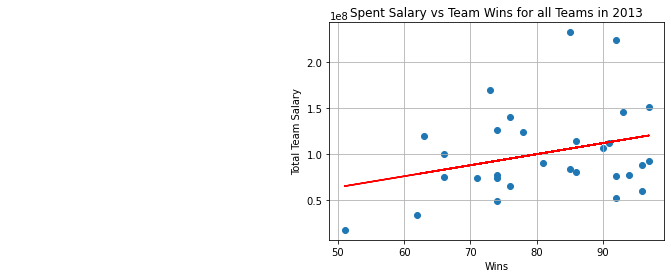

In [57]:

x_value=new_df['W']
y_value=new_df['salary']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept
plt.plot(x_value,y,"r-")
plt.annotate(line,(0,0),fontsize=15, color='red')
plt.scatter(new_df['W'],new_df['salary'])
plt.xlabel("Wins")
plt.ylabel('Total Team Salary')
plt.title("Spent Salary vs Team Wins for all Teams in 2013")
plt.grid()
print("the r value is " + str(rvalue))

the r value is 0.2651369022466299


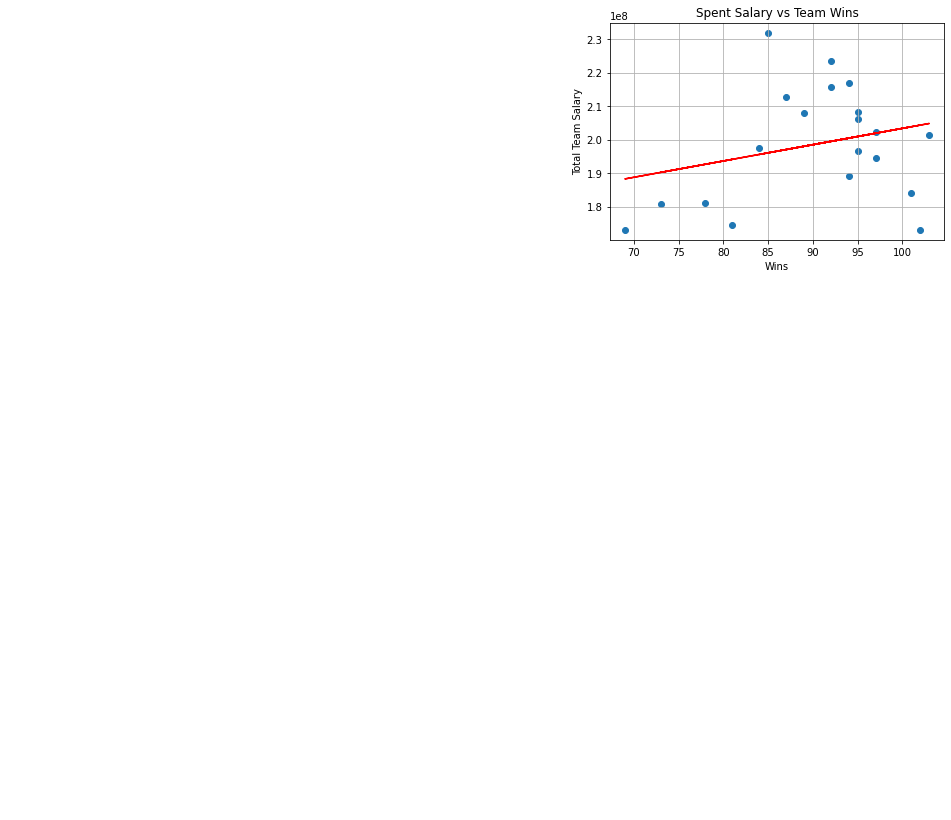

In [40]:

x_value=small_df['W']
y_value=small_df['salary']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept
plt.plot(x_value,y,"r-")
plt.annotate(line,(0,0),fontsize=15, color='red')
plt.scatter(small_df['W'],small_df['salary'])
plt.xlabel("Wins")
plt.ylabel('Total Team Salary')
plt.title("Spent Salary vs Team Wins")
plt.grid()
print("the r value is " + str(rvalue))